In [1]:
# Importing all the necessary libraries.

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step - 1:
- Alternate Hypothesis(Bold claim):$$ H_1: \ \mu \neq 500$$ 
- Null Hypothesis(Status Quote):$$ H_0: \ \mu = 500 $$

Step - 2: 
- Collect a sample of size n = 10.$$[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]$$
- After computing, we get sample mean($\overline{x}$) as: $$\overline{x} = 465.3$$

Step - 3: Compute Test Statistic:
- As population variance is unknown: $$ t = \frac{\overline{x} - \mu}{(s/\sqrt[2]{n})}$$

Step - 4: Considered significance level $ \alpha = 0.95 $
- Lower the $ \alpha $ means we need stronger evidence to reject Null Hypothesis($ H_0 $)

Step - 5: Apply Decision Rule
- 5.1 As population variance is not given, we are applying t- test statistic, the conditions of t-test statistics are:
 - Two tailed t-test: $$ |t|>t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Right tailed t-test: $$ t>t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Left tailed t-test: $$ t<t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 

- 5.2 The another method is by computing p-value P(Test Statistics\$ H_0 $) 
 - For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
 - For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [2]:
# Step2 Computing Sample mean for sample size n = 10 and Sample Standard Deviation. 

x = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
print("Sum of the Observations:",sum(x))
print("Number of Observations:",len(x))
print("Sample Mean =",sum(x)/len(x))
sample_std = np.std(x, ddof=1)
print("Sample Standard Deviation:",sample_std)

Sum of the Observations: 4653
Number of Observations: 10
Sample Mean = 465.3
Sample Standard Deviation: 86.84859110991829


In [3]:
# Step3 and step4 are perfroming Two- Tailed Test as Alternate Hypothesis is having not equal symbol, 
# considering significance level value as 0.95 and calculating t-critical value.

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical =  t.ppf(1-(alpha/2),df=9) # Two tailed t-score for 95% Confidence Level
print("alpha:",alpha)
print("t-critical value:",t_critical)

alpha: 0.050000000000000044
t-critical value: 2.2621571627409915


In [4]:
# Required data for t-test and p-test.
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 86.84859110991829

In [5]:
# t-score.
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / (sample_size**0.5)
    return numerator / denominator
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("t-score:",t)

t-score: -1.263475128444671


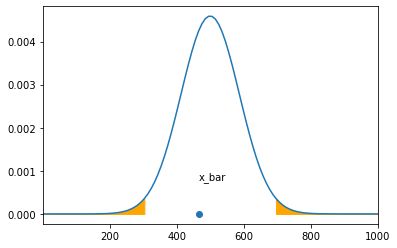

In [6]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 1
x_max = 1000

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
sample_std = sample_std

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, sample_std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * sample_std)
t_critical_right = pop_mean + (t_critical * sample_std)

# Shading the left rejection region
x1 = np.linspace(t_critical_left, x_min,100)
y1 = norm.pdf(x1, mean, sample_std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, sample_std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean,0)
plt.annotate("x_bar", (sample_mean,0.0008))
plt.show()

In [7]:
# Conclusion using t-test

print("t-score",np.abs(t))
print("t_critical",t_critical)
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

t-score 1.263475128444671
t_critical 2.2621571627409915
Fail to reject Null Hypothesis


In [8]:
# Conclusion using p-test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)
print("alpha:",alpha)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818137
alpha: 0.050000000000000044
Fail to reject Null Hypothesis


#### Q-2:  You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step - 1:
- Alternate Hypothesis(Bold claim):$$ H_1: \ \mu > 4 $$ 
- Null Hypothesis(Status Quote):$$ H_0: \ \mu \leq 4 $$

Step - 2: 
- Collect a sample of size n = 10.$$[1,2,3,4,5,5,6,4,8,10]$$
- After computing sample mean, we get $\overline{x}$ as: $$\overline{x} = 4.8$$

Step - 3: Compute Test Statistic:
- As population variance is unknown: $$ t = \frac{\overline{x} - \mu}{(s/\sqrt[2]{n})}$$

Step - 4: Considered significance level $ \alpha = 0.95 $
- Lower the $ \alpha $ means we need stronger evidence to reject Null Hypothesis($ H_0 $)

Step - 5: Apply Decision Rule
- 5.1 As population variance is not given, we are applying t- test statistic, the conditions of t-test statistics are:
 - Two tailed t-test: $$ |t|>t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Right tailed t-test: $$ t>t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Left tailed t-test: $$ t<t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 

- 5.2 The another method is by computing p-value P(Test Statistics\$ H_0 $) 
 - For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
 - For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [9]:
# Importing all the necessary libraries.

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics

In [10]:
# Step2 Computing Sample mean for sample size n = 10 and Sample Standard Deviation.

x = [1,2,3,4,5,5,6,4,8,10]
print("Sum of the Observations:",sum(x))
print("Number of Observations:",len(x))
print("Sample Mean =",sum(x)/len(x))
sample_std = np.std(x, ddof=1)
print("Sample Standard Deviation:",sample_std)

Sum of the Observations: 48
Number of Observations: 10
Sample Mean = 4.8
Sample Standard Deviation: 2.699794230842212


In [11]:
# Step3 and Step4 are perfroming one- Tailed Test as Alternate Hypothesis is having greater than symbol,
# considering confidence or significance level as 0.95 and calculating t-critical value.

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical =  t.ppf(1-(alpha),df=9) # one - tailed t-score for 95% Confidence Level
print("Alpha:",alpha)
print("t-critical value:",t_critical)

Alpha: 0.050000000000000044
t-critical value: 1.8331129326536335


In [12]:
# Required data for t-test and p-test.

sample_size = 10
sample_mean = 4.8
pop_mean = 5
sample_std = 2.699794230842212

In [13]:
#t-score

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / (sample_size**0.5)
    return numerator / denominator
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("t-score:",t)

t-score: -0.2342606428329093


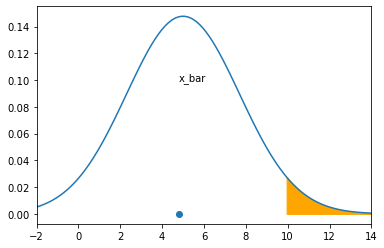

In [14]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = -2
x_max = 14

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

In [15]:
# Conclusion using t-test

print("t-score",t)
print("t_critical",t_critical)
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

t-score -0.2342606428329093
t_critical 1.8331129326536335
Fail to reject Null Hypothesis


In [16]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)
print("Alpha:",alpha)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.4073913191591827
Alpha: 0.050000000000000044
Fail to reject Null Hypothesis


#### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:
- Alternate Hypothesis(Bold claim):$$ H_1: \ \mu > 15 $$ 
- Null Hypothesis(Status Quote):$$ H_0: \ \mu \leq 15 $$

Step - 2: 
- Collect a sample of size n = 20.$$[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]$$

- After computing we get sample mean($\overline{x}$) as: $$\overline{x} = 15.098$$

Step - 3: Compute Test Statistic:
- As population variance is unknown: $$ t = \frac{\overline{x} - \mu}{(s/\sqrt[2]{n})}$$

Step - 4: Considered significance level $ \alpha = 0.95 $
- Lower the $ \alpha $ means we need stronger evidence to reject Null Hypothesis($ H_0 $)

Step - 5: Apply Decision Rule
- 5.1 As population variance is not given, we are applying t- test statistic, the conditions of t-test statistics are:
 - Two tailed t-test: $$ |t|>t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Right tailed t-test: $$ t>t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Left tailed t-test: $$ t<t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 

- 5.2 The another method is by computing p-value P(Test Statistics\$ H_0 $) 
 - For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
 - For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [17]:
# Importing all the necessary Libraries.

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics

In [18]:
# Step2: Computing Sample Mean for sample size n = 20 and Sample Standard Deviation.

x = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
print("Sum of the Observations:",sum(x))
print("Number of Observations:",len(x))
print("Sample Mean =",sum(x)/len(x))
sample_std = np.std(x, ddof=1)
print("Sample Standard Deviation:",sample_std)

Sum of the Observations: 301.97999999999996
Number of Observations: 20
Sample Mean = 15.098999999999998
Sample Standard Deviation: 1.0253671999517255


In [19]:
# Step3 and Step4 are perfroming one- Tailed Test as Alternate Hypothesis is having greater than symbol,
# considering confidence level = 0.95 and calculating t-critical value.

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical =  t.ppf(1-(alpha),df=19) # One tailed t-score for 95% Confidence Level
print("Alpha:",alpha)
print("t-critical value:",t_critical)

Alpha: 0.050000000000000044
t-critical value: 1.729132811521367


In [20]:
# Required data for t-test and p-test.

sample_size = 20
sample_mean = 15.09
pop_mean = 15
sample_std = 1.0253671999517255

In [21]:
#t-score.

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / (sample_size**0.5)
    return numerator / denominator
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("t-score:",t)

t-score: 0.39253472899163433


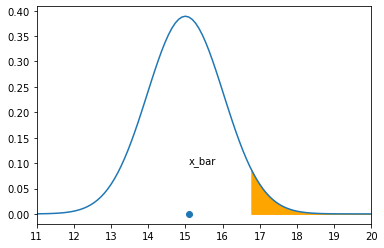

In [22]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 11
x_max = 20

# Defining the sampling distribution mean and sampling distribution std.
mean = pop_mean
std = sample_std

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)

plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region.
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

In [23]:
# Conclusion using t - test
print("t-score",t)
print("t-critical",t_critical)
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

t-score 0.39253472899163433
t-critical 1.729132811521367
Fail to reject Null Hypothesis


In [24]:
# Conclusion using p - test
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)
print("Alpha:",alpha)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.34733157804610093
Alpha: 0.050000000000000044
Fail to reject Null Hypothesis


#### Q-4) You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step - 1:
- Alternate Hypothesis(Bold claim):$$ H_1: \ \mu < 100ms $$ 
- Null Hypothesis(Status Quote):$$ H_0: \ \mu \geq 100ms $$

Step - 2: 
- Collect a sample of size n = 10.$$[100,50,75,90,80,50,60,65,88,99]$$
- After computing we get sample mean($\overline{x}$) as: $$\overline{x} = 75.7$$

Step - 3: Compute Test Statistic:
- As population variance is unknown: $$ t = \frac{\overline{x} - \mu}{(s/\sqrt[2]{n})}$$

Step - 4: Considered significance level $ \alpha = 0.95 $
- Lower the $ \alpha $ means we need stronger evidence to reject Null Hypothesis($ H_0 $)

Step - 5: Apply Decision Rule
- 5.1 As population variance is not given, we are applying t- test statistic, the conditions of t-test statistics are:
 - Two tailed t-test: $$ |t|>t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Right tailed t-test: $$ t>t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 - Left tailed t-test: $$ t<t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 

- 5.2 The another method is by computing p-value P(Test Statistics\$ H_0 $) 
 - For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
 - For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [25]:
# importing all the necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics

In [26]:
# Step2 Sample mean for sample size n = 10 and Sample Standard Deviation.

x = [100,50,75,90,80,50,60,65,88,99]
print("Sum of the Observations:",sum(x))
print("Number of Observations:",len(x))
print("Sample Mean =",sum(x)/len(x))
sample_std = np.std(x, ddof=1)
print("Sample Standard Deviation:",sample_std)

Sum of the Observations: 757
Number of Observations: 10
Sample Mean = 75.7
Sample Standard Deviation: 18.826990082207924


In [27]:
# Step3 Performing one- Tailed Test as Alternate Hypothesis is having less than symbol, 
#considering significance level as 0.95 and calculating t-critical value.

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical =  t.ppf(1-(alpha),df=9) # one tailed t-score for 95% Confidence Level
print("Alpha:",alpha)
print("t-critical value:",t_critical)

Alpha: 0.050000000000000044
t-critical value: 1.8331129326536335


In [28]:
#Required data for t-test and p-test.

sample_size = 10
sample_mean = 75.7
pop_mean = 100
sample_std = 18.826990082207924

In [29]:
# t-score.
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / (sample_size**0.5)
    return numerator / denominator
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("t-Score:",t)

t-Score: -4.081552431193497


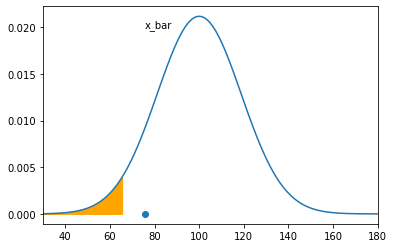

In [30]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 30
x_max = 180

# Defining the sampling distribution mean and sampling distribution std.
mean = pop_mean
std = sample_std

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)

plt.plot(x, y)

# Computing the left critical value (left tailed Test)
t_critical_left = pop_mean + (-t_critical * std)

# Shading the left rejection region.
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results.
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))
plt.show()

In [31]:
# Conclusion using t - test

print("t-Score",t)
print("t_critical:",t_critical)
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

t-Score -4.081552431193497
t_critical: 1.8331129326536335
Reject Null Hypothesis


In [32]:
# Conclusion using p - test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)
print("Alpha:",alpha)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  2.2367941372558597e-05
Alpha: 0.050000000000000044
Reject Null Hypothesis
